In [71]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
iris = load_iris()

In [32]:
df = pd.DataFrame(data=iris.data , columns=iris.feature_names)

In [33]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
df.shape

(150, 4)

In [35]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

#### its good our data seet has no null value

In [38]:
df['target'] = iris.target

In [39]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
df.target.unique()

array([0, 1, 2])

In [44]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Here we have 3 types of flowers 'setosa', 'versicolor', 'virginica', and these flowers has their dummies 1,2,3 as in our data set

#### here we have to predict on basis sepal/petal legth and width, which flowe type s it

#### let we devide our dataset into train and test data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df.drop(['target'],axis=1)

In [48]:
y = df.target

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=10)

In [50]:
X_train.shape

(120, 4)

#### We use losgistic regression for prediction

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model1 = LogisticRegression()

In [56]:
model1.fit(X_train,y_train)

LogisticRegression()

In [58]:
model1.score(X_train,y_train)*100

97.5

In [60]:
model1.score(X_test,y_test)*100

100.0

#### our model shows 97% and 100% accuracy for train and test resp.

In [62]:
y_pred = model1.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix

In [68]:
cn = confusion_matrix(y_test,y_pred)
cn

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

In [66]:
import seaborn as sn

Text(33.0, 0.5, 'Original')

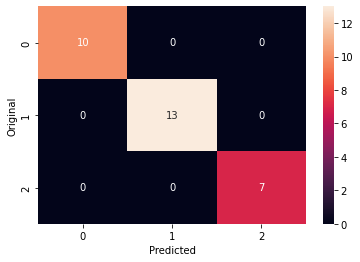

In [73]:
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Original')

### So from confusion matrics all our flowers are predicted accuratly, and diagonal quantity shows number of that flowers